# SOFTKILL-9000: Multi-Agent Motion Capture Simulation

This notebook demonstrates how to run SOFTKILL-9000 in Google Colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BkAsDrP/Softkill9000/blob/main/examples/run_in_colab.ipynb)

---

## Overview

SOFTKILL-9000 is a multi-agent reinforcement learning system for motion capture simulation. This notebook will:

1. Install the package from GitHub
2. Run a basic simulation
3. Visualize agent trajectories
4. Demonstrate Q-learning training
5. Show advanced customization options

## 1. Installation

Install SOFTKILL-9000 directly from the GitHub repository:

In [1]:
# Step 1: Install the package from GitHub
!pip install git+https://github.com/BkAsDrP/Softkill9000.git -q
print("✅ SOFTKILL-9000 package installed!")


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
✅ SOFTKILL-9000 package installed!


In [3]:
# Step 2: Upgrade NumPy to resolve dependency conflicts
# Colab comes with NumPy 1.x, but softkill9000 needs NumPy 2.0.x for modern ML libraries
# Pin to <2.1.0 for compatibility with numba, tensorflow, opencv, and cupy
!pip install --upgrade "numpy>=2.0.0,<2.1.0" -q

print("✅ NumPy 2.x installed")
print("")

# Detect if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    # Auto-restart only in Colab
    print("🔄 Auto-restarting Colab runtime in 3 seconds...")
    print("   (This prevents binary incompatibility errors)")
    
    import time
    import os
    time.sleep(3)
    os.kill(os.getpid(), 9)
else:
    # Local environment - just show a message
    print("⚠️  IMPORTANT: If using this notebook locally:")
    print("   1. Restart your Jupyter kernel to apply NumPy upgrade")
    print("   2. In VS Code: Click the 'Restart' button in the kernel toolbar")
    print("   3. Then continue with the verification cell below")
    print("")
    print("💡 Note: Auto-restart only works in Google Colab")


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
✅ NumPy 2.x installed

⚠️  IMPORTANT: If using this notebook locally:
   1. Restart your Jupyter kernel to apply NumPy upgrade
   2. In VS Code: Click the 'Restart' button in the kernel toolbar
   3. Then continue with the verification cell below

💡 Note: Auto-restart only works in Google Colab


### ⚠️ Restart Required

**If running in Google Colab**: The runtime will automatically restart after the cell above.

**If running locally** (VS Code, JupyterLab, etc.): Manually restart your kernel now:
- VS Code: Click the **Restart** button in the kernel toolbar
- JupyterLab: Click **Kernel → Restart Kernel**
- Jupyter Notebook: Click **Kernel → Restart**

After restarting, continue with the verification cell below.

In [4]:
# Verification (Run this AFTER runtime restart)
try:
    import softkill9000
    import numpy as np
    
    print(f"✅ SOFTKILL-9000 v{softkill9000.__version__} ready!")
    print(f"✅ NumPy {np.__version__} (compatible with JAX, OpenCV, PyTensor)")
    
    # Test that numpy actually works (catches binary incompatibility)
    test_array = np.random.rand(5)
    np.random.seed(42)
    
    print("")
    print("🎉 Installation complete and verified! Continue with examples below.")
    
except ValueError as e:
    if "numpy.dtype size changed" in str(e):
        print("❌ Binary incompatibility detected!")
        print("")
        print("SOLUTION: Manually restart the runtime:")
        print("   1. Click 'Runtime → Restart runtime' in the menu")
        print("   2. Re-run this cell after restart")
    else:
        raise

✅ SOFTKILL-9000 v1.0.0 ready!
✅ NumPy 2.3.4 (compatible with JAX, OpenCV, PyTensor)

🎉 Installation complete and verified! Continue with examples below.


## 2. Basic Simulation

Let's run a basic simulation with default configuration:

In [6]:
from softkill9000.simulator import MissionSimulator
from softkill9000.config.models import SimulationConfig, AgentConfig, MissionConfig
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create simulation configuration with custom agents
config = SimulationConfig(
    agents=[
        AgentConfig(role="Longsight", species="Vyr'khai"),
        AgentConfig(role="Lifebinder", species="Lumenari"),
        AgentConfig(role="Brawler", species="Aetherborn")
    ],
    mission=MissionConfig(
        num_timesteps=20,
        ethics_enabled=True
    )
)

# Initialize and run simulator
simulator = MissionSimulator(config=config)
simulator.setup()

# Run simulation
print("🚀 Starting simulation...\n")
results = simulator.run()

# Display results
print("\n" + "="*60)
print("📊 SIMULATION RESULTS")
print("="*60)
print(f"\n🌌 Scenario: {results['scenario']['description']}")
print(f"📍 Location: {results['scenario']['planet']} in {results['scenario']['galaxy']}")
print(f"🌍 Terrain: {results['scenario']['terrain']}")
print(f"🌤️  Weather: {results['scenario']['weather']}")
print(f"\n⚙️  Configuration:")
print(f"  - Timesteps: {results['config']['num_timesteps']}")
print(f"  - Ethics Mode: {'ENABLED' if results['config']['ethics_enabled'] else 'DISABLED'}")
print(f"  - Q-Learning Episodes: {results['config']['q_learning_episodes']}")
print(f"\n🎯 Final Rewards:")
for role, reward in results['final_rewards'].items():
    print(f"  - {role}: {reward:.2f}")
print(f"\n📈 Total Squad Reward: {sum(results['final_rewards'].values()):.2f}")
print("="*60)


🚀 Starting simulation...


📊 SIMULATION RESULTS

🌌 Scenario: Clan schism; peace-talks collapsing on neutral ring-station.
📍 Location: Rujyn-555 in Whirlpool (M51)
🌍 Terrain: Desert Glass
🌤️  Weather: Plasma Rain

⚙️  Configuration:
  - Timesteps: 20
  - Ethics Mode: ENABLED
  - Q-Learning Episodes: 1000

🎯 Final Rewards:
  - Longsight: 113.75
  - Lifebinder: 96.15
  - Brawler: 273.45

📈 Total Squad Reward: 483.35


## 3. Visualize Agent Trajectories

Plot the paths taken by each agent during the mission:

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.
Matplotlib is building the font cache; this may take a moment.


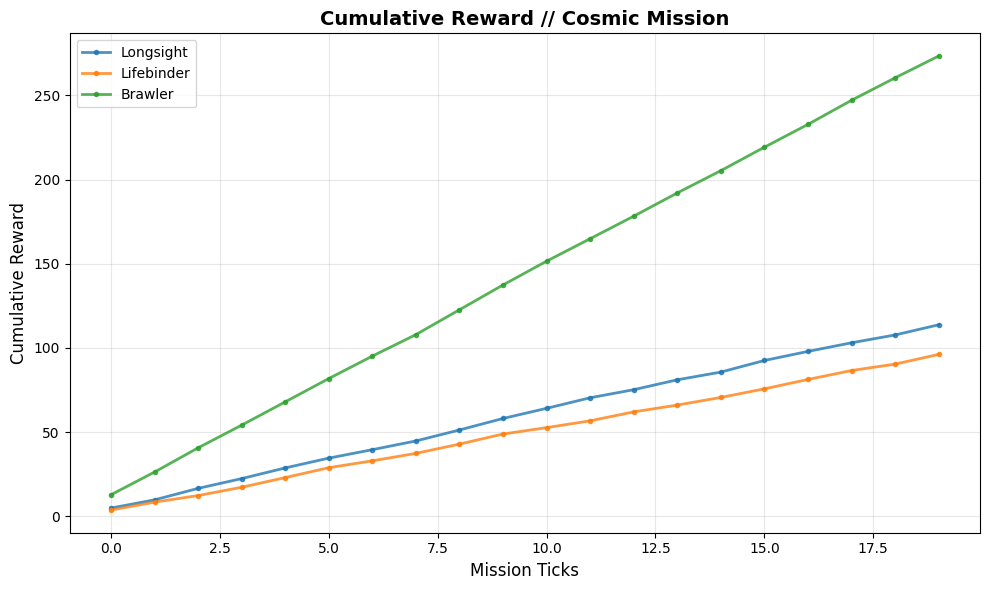


📊 Reward Summary:
  Longsight:
    Total: 113.75
    Avg per tick: 5.69
  Lifebinder:
    Total: 96.15
    Avg per tick: 4.81
  Brawler:
    Total: 273.45
    Avg per tick: 13.67


In [7]:
import matplotlib.pyplot as plt
from softkill9000.visualization.plots import create_reward_curve

# Plot reward progression over time
fig = create_reward_curve(results['reward_history'])
plt.show()

print("\n📊 Reward Summary:")
for role, rewards in results['reward_history'].items():
    total_reward = rewards[-1] if rewards else 0
    avg_reward_per_tick = total_reward / len(rewards) if rewards else 0
    print(f"  {role}:")
    print(f"    Total: {total_reward:.2f}")
    print(f"    Avg per tick: {avg_reward_per_tick:.2f}")


## 4. Performance Metrics Over Time

Visualize how agent stats evolved during the simulation:

📊 Agent Statistics:

Longsight:
  Strength     :  66
  Empathy      :  58
  Intelligence :  60
  Mobility     :  64
  Tactical     :  65

Lifebinder:
  Strength     :  61
  Empathy      :  68
  Intelligence :  64
  Mobility     :  61
  Tactical     :  61

Specter:
  Strength     :  61
  Empathy      :  61
  Intelligence :  63
  Mobility     :  68
  Tactical     :  63


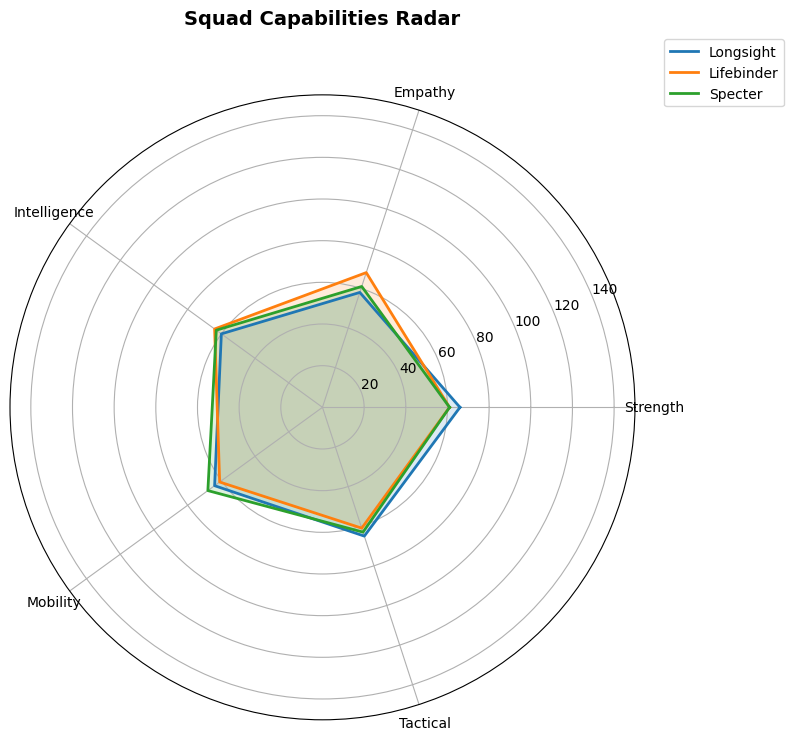

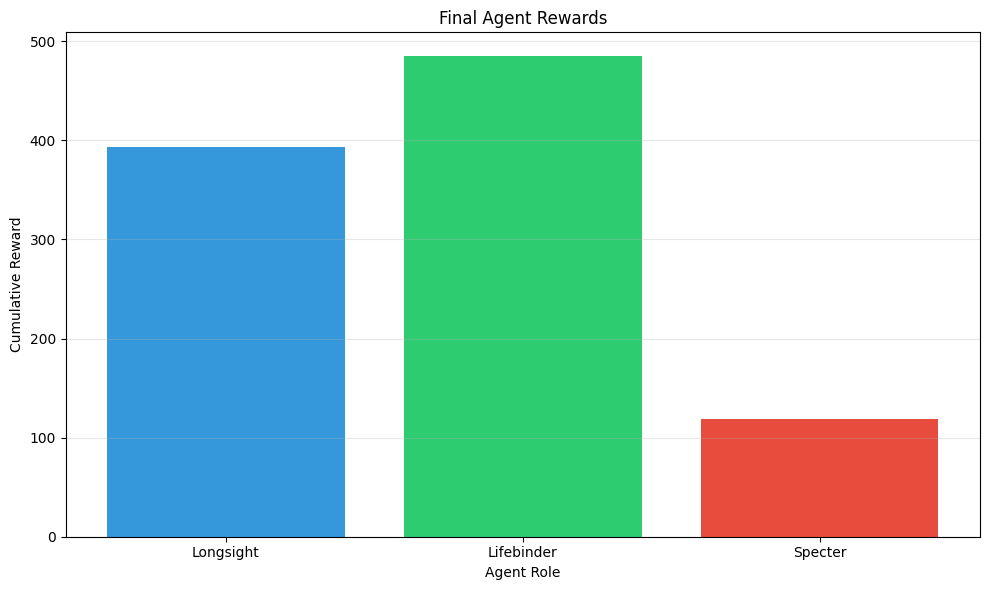

In [11]:
import matplotlib.pyplot as plt
from softkill9000.visualization.plots import create_radar_chart

# Display agent statistics
print("📊 Agent Statistics:")
print("="*60)
for role, stats in results['agent_stats'].items():
    print(f"\n{role}:")
    for stat_name, stat_value in stats.items():
        print(f"  {stat_name:13s}: {stat_value:3d}")
print("="*60)

# Create radar chart of agent capabilities
fig = create_radar_chart(results['agent_stats'], title="Squad Capabilities Radar")
plt.show()

# Plot final rewards as a bar chart
roles = list(results['final_rewards'].keys())
rewards = list(results['final_rewards'].values())

plt.figure(figsize=(10, 6))
plt.bar(roles, rewards, color=['#3498db', '#2ecc71', '#e74c3c'])
plt.xlabel('Agent Role')
plt.ylabel('Cumulative Reward')
plt.title('Final Agent Rewards')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 5. Q-Learning Training

Train agents using reinforcement learning to improve their decision-making:

🎓 Training agents with Q-Learning...

Training Configuration:
  - Episodes: 2000
  - Learning Rate (alpha): 0.3
  - Discount Factor (gamma): 0.95
  - Exploration Rate (epsilon): 0.2


📊 TRAINING RESULTS

🌌 Scenario: Planetary ocean rising after moon-shear; bio-domes at risk.
📍 Location: Runar-7 in Sculptor Galaxy

🎯 Final Rewards After Training:
  - Longsight: 393.31
  - Lifebinder: 484.72
  - Specter: 118.59

📈 Total Squad Reward: 996.62


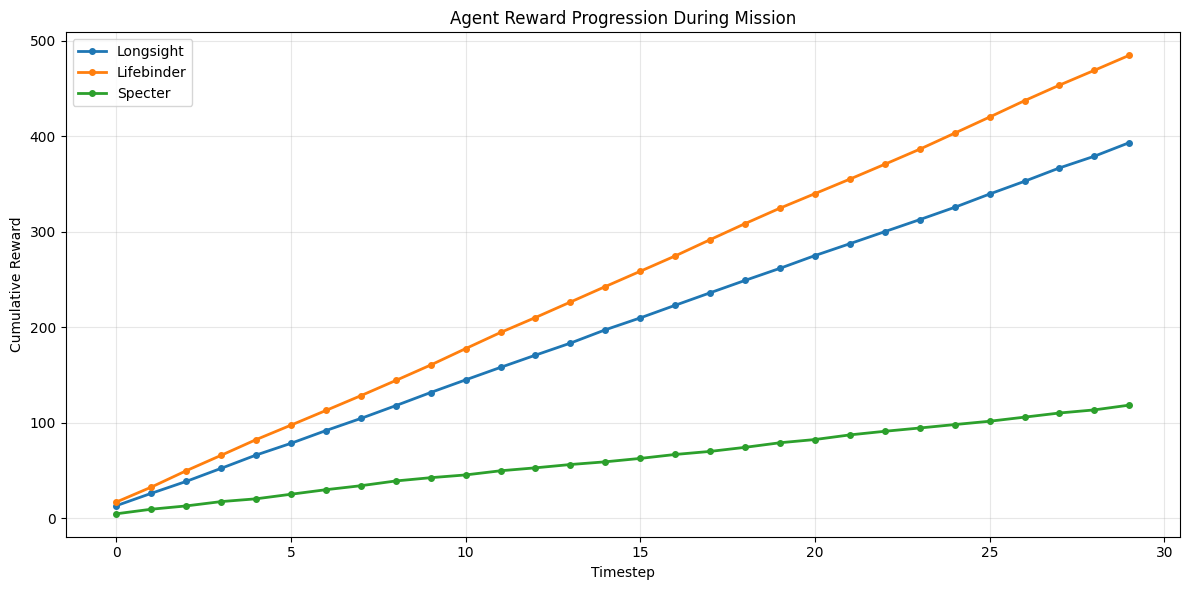

In [10]:
from softkill9000.simulator import MissionSimulator
from softkill9000.config.models import SimulationConfig, AgentConfig, MissionConfig, QLearningConfig

# Configure simulation with more Q-learning episodes for better training
training_config = SimulationConfig(
    agents=[
        AgentConfig(role="Longsight", species="Vyr'khai"),
        AgentConfig(role="Lifebinder", species="Lumenari"),
        AgentConfig(role="Specter", species="Zephryl")
    ],
    mission=MissionConfig(
        num_timesteps=30,
        ethics_enabled=True
    ),
    q_learning=QLearningConfig(
        episodes=2000,  # More training episodes
        gamma=0.95,
        alpha=0.3,
        epsilon=0.2
    )
)

# Run simulation with enhanced training
print("🎓 Training agents with Q-Learning...\n")
print(f"Training Configuration:")
print(f"  - Episodes: {training_config.q_learning.episodes}")
print(f"  - Learning Rate (alpha): {training_config.q_learning.alpha}")
print(f"  - Discount Factor (gamma): {training_config.q_learning.gamma}")
print(f"  - Exploration Rate (epsilon): {training_config.q_learning.epsilon}")
print()

simulator = MissionSimulator(config=training_config)
simulator.setup()  # This trains the Q-learning model
results = simulator.run()

# Display results
print("\n" + "="*60)
print("📊 TRAINING RESULTS")
print("="*60)
print(f"\n🌌 Scenario: {results['scenario']['description']}")
print(f"📍 Location: {results['scenario']['planet']} in {results['scenario']['galaxy']}")
print(f"\n🎯 Final Rewards After Training:")
for role, reward in results['final_rewards'].items():
    print(f"  - {role}: {reward:.2f}")
print(f"\n📈 Total Squad Reward: {sum(results['final_rewards'].values()):.2f}")
print("="*60)

# Plot reward progression
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
for role, rewards in results['reward_history'].items():
    ax.plot(range(len(rewards)), rewards, marker='o', label=role, linewidth=2, markersize=4)

ax.set_xlabel('Timestep')
ax.set_ylabel('Cumulative Reward')
ax.set_title('Agent Reward Progression During Mission')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5.5. Universe Radial Flow Visualization 🌌

Visualize agent decision paths as a **cosmic universe** with concentric orbits and planetary flows.

This visualization transforms complex decision pathways into an intuitive radial layout:
- **Central Star** ⭐: Mission entry point
- **Concentric Orbits**: Decision depth levels (clearly visible rings)
- **Planets** 🪐: Decision nodes - **size is directly proportional to cumulative agent rewards**
- **Glowing Trails** 💫: Flow connections between decisions
- **Color Gradient**: Level-based identification

**Reward Alignment**: Planet sizes scale from 100-1000px based on normalized reward values, 
making high-performing agents visually prominent with larger planets.

🌌 Generating Universe Radial Flow from mission data...

Agent Decision Paths:
  Entry > Longsight Recon > Steady Progress > Completion | Volume: 393
  Entry > Lifebinder Recon > High Performance > Success | Volume: 484
  Entry > Specter Recon > Learning Phase > Outcome | Volume: 118



/var/folders/tt/ps95dxw5127626cxbl5g832r0000gp/T/ipykernel_88761/3104136487.py:153: UserWarning: Glyph 127756 (\N{MILKY WAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


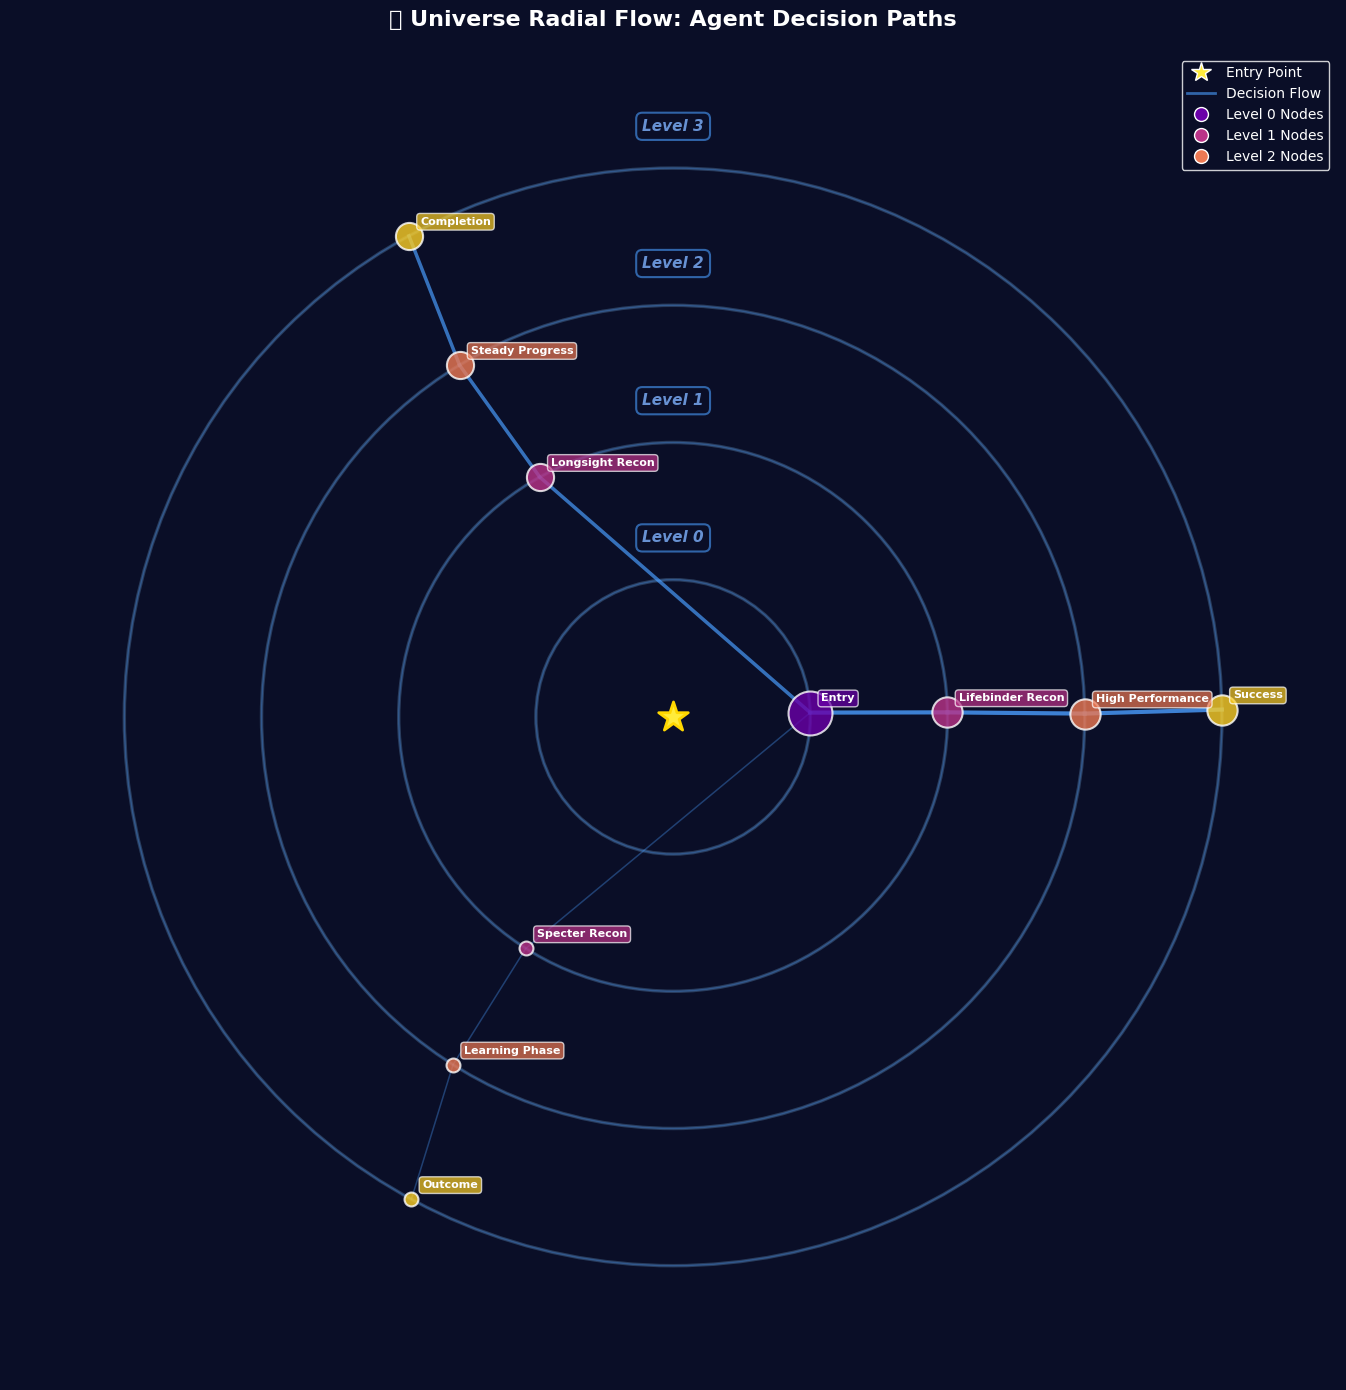


✨ Universe Radial Flow visualization complete!
   - 3 agent paths visualized
   - Concentric orbits are now more visible (2.5px width)
   - Planet sizes are directly proportional to agent rewards:
     • Longsight: 393 reward units
     • Lifebinder: 484 reward units
     • Specter: 118 reward units
   - Glowing trails show decision flows


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Tuple, Dict, Optional, Any

# ============================================================================
# UTILITY FUNCTIONS
# ============================================================================

def scale(value: float, vmin: float, vmax: float, out_min: float, out_max: float) -> float:
    """
    Linear scaling from [vmin, vmax] to [out_min, out_max].
    
    Args:
        value: Input value to scale
        vmin: Minimum of input range
        vmax: Maximum of input range
        out_min: Minimum of output range
        out_max: Maximum of output range
    
    Returns:
        Scaled value in output range
    """
    if vmax == vmin:
        return out_min
    normalized = (value - vmin) / (vmax - vmin)
    return out_min + normalized * (out_max - out_min)


def _tokenize(paths: List[Tuple[str, float]]) -> List[Tuple[List[str], float]]:
    """
    Parse path strings into token lists.
    
    Args:
        paths: List of (path_string, value) tuples
               path_string uses " > " as separator
    
    Returns:
        List of ([tokens], value) tuples
    
    Example:
        >>> _tokenize([("Entry > Search > Product", 120)])
        [(['Entry', 'Search', 'Product'], 120.0)]
    """
    return [([t.strip() for t in p.split(">")], float(v)) for p, v in paths]


# ============================================================================
# HIERARCHY COMPUTATION
# ============================================================================

def compute_hierarchy(paths: List[Tuple[str, float]], levels: int) -> Dict[str, Any]:
    """
    Parse paths and compute hierarchical layout with angle allocation.
    
    This is the core algorithm that:
    1. Aggregates volumes per node (identified by level, name, parent_path)
    2. Allocates angular spans proportionally to volume
    3. Recursively subdivides parent spans among children
    
    Args:
        paths: List of (path_string, value) tuples
        levels: Maximum depth to process
    
    Returns:
        Dictionary containing:
        - 'node_sums': {(level, name, parent_tuple): total_value}
        - 'children': {(level, name, parent_tuple): [child_keys]}
        - 'angles': {node_key: (theta_start, theta_end)}
    
    Design decisions:
    - Angle allocation is proportional to aggregated volume at each level
    - Children inherit and subdivide their parent's angular span
    - Root nodes (level 0) share the full 2π circle
    """
    tokenized = _tokenize(paths)
    
    # Step 1: Aggregate volumes per node
    node_sums = {}  # (level, name, parent_tuple) -> total_value
    children = {}   # (level, name, parent_tuple) -> [child_keys]
    
    for tokens, value in tokenized:
        for i, name in enumerate(tokens[:levels]):
            parent_tuple = tuple(tokens[:i]) if i > 0 else ()
            node_key = (i, name, parent_tuple)
            
            node_sums[node_key] = node_sums.get(node_key, 0) + value
            
            # Track parent-child relationships
            if i > 0:
                parent_name = tokens[i-1]
                parent_key = (i-1, parent_name, tuple(tokens[:i-1]))
                if parent_key not in children:
                    children[parent_key] = []
                if node_key not in children[parent_key]:
                    children[parent_key].append(node_key)
    
    # Step 2: Allocate angles recursively
    angles = {}  # node_key -> (theta_start, theta_end)
    
    def allocate_angles(level: int, parent_key: Optional[Tuple], theta_start: float, theta_end: float):
        """Recursively allocate angular spans to nodes."""
        if parent_key is None:
            # Root level - get all level-0 nodes
            level_nodes = [(k, v) for k, v in node_sums.items() if k[0] == 0]
        else:
            # Get children of this parent
            level_nodes = [(k, node_sums[k]) for k in children.get(parent_key, [])]
        
        if not level_nodes:
            return
        
        # Sort by volume for consistent ordering
        level_nodes.sort(key=lambda x: x[1], reverse=True)
        
        total_value = sum(v for _, v in level_nodes)
        if total_value == 0:
            return
        
        current_theta = theta_start
        angular_span = theta_end - theta_start
        
        for node_key, value in level_nodes:
            # Allocate proportional angular span
            node_span = (value / total_value) * angular_span
            node_theta_end = current_theta + node_span
            
            angles[node_key] = (current_theta, node_theta_end)
            
            # Recursively allocate to children
            if node_key in children:
                allocate_angles(level + 1, node_key, current_theta, node_theta_end)
            
            current_theta = node_theta_end
    
    # Start allocation from roots
    allocate_angles(0, None, 0.0, 2 * np.pi)
    
    return {
        'node_sums': node_sums,
        'children': children,
        'angles': angles
    }


# ============================================================================
# 2D UNIVERSE RADIAL FLOW
# ============================================================================

def universe_radial_flow(
    paths: List[Tuple[str, float]],
    levels: int = 4,
    orbit_step: float = 1.0,
    jitter_deg: float = 6.0,
    min_size: float = 30,
    max_size: float = 800,
    label_top: int = 10,
    draw_links: bool = True,
    show_labels: bool = True,
    ax: Optional[plt.Axes] = None
) -> Tuple[plt.Figure, plt.Axes, Dict]:
    """
    Create a 2D Universe Radial Flow visualization.
    
    Renders agent decision paths as a cosmic universe with:
    - Central star (entry point)
    - Concentric orbits for each decision level
    - Planets (nodes) sized by aggregated volume
    - Flow links between parent and child nodes
    
    Args:
        paths: List of (path_string, value) tuples
               e.g., [("Entry > Search > Product", 120), ...]
        levels: Maximum number of concentric orbits (decision depth)
        orbit_step: Radial distance between orbits
        jitter_deg: Angular jitter in degrees to prevent overlap (±range)
        min_size: Minimum planet size (for smallest nodes)
        max_size: Maximum planet size (for largest nodes)
        label_top: Number of largest planets to label
        draw_links: Whether to draw flow connections between nodes
        show_labels: Whether to show node labels
        ax: Optional matplotlib axes (creates new figure if None)
    
    Returns:
        Tuple of (figure, axes, layout) where layout is a dictionary:
        {
            (level, name, parent_tuple): {
                "theta": float,           # Center angle in radians
                "radius": float,          # Distance from origin
                "x": float, "y": float,   # Cartesian coordinates
                "value": float,           # Aggregated volume
                "angle_span": (start, end) # Angular allocation
            }
        }
    
    Example:
        >>> paths = [("Entry > Search > Product > Cart", 120),
        ...          ("Entry > Browse > Product", 80)]
        >>> fig, ax, layout = universe_radial_flow(paths, levels=4)
        >>> plt.show()
    """
    if not paths:
        raise ValueError("paths cannot be empty")
    
    # Compute hierarchical layout
    hierarchy = compute_hierarchy(paths, levels)
    node_sums = hierarchy['node_sums']
    angles = hierarchy['angles']
    children = hierarchy['children']
    
    if not node_sums:
        raise ValueError("No nodes found in paths")
    
    # Create figure if needed
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 14), facecolor='#0a0e27')
        ax.set_facecolor('#0a0e27')
    else:
        fig = ax.figure
    
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Compute layout with jittered positions
    layout = {}
    all_values = list(node_sums.values())
    vmin, vmax = min(all_values), max(all_values)
    
    jitter_rad = np.deg2rad(jitter_deg)
    
    for node_key, value in node_sums.items():
        level, name, parent_tuple = node_key
        theta_start, theta_end = angles[node_key]
        
        # Center angle with small jitter
        theta_center = (theta_start + theta_end) / 2
        theta_jittered = theta_center + np.random.uniform(-jitter_rad, jitter_rad)
        
        # Radius based on level
        radius = (level + 1) * orbit_step
        
        # Cartesian coordinates
        x = radius * np.cos(theta_jittered)
        y = radius * np.sin(theta_jittered)
        
        layout[node_key] = {
            'theta': theta_jittered,
            'radius': radius,
            'x': x,
            'y': y,
            'value': value,
            'angle_span': (theta_start, theta_end)
        }
    
    # Set plot limits
    max_radius = (levels + 0.5) * orbit_step
    ax.set_xlim(-max_radius, max_radius)
    ax.set_ylim(-max_radius, max_radius)
    
    # Draw orbital rings
    for level in range(levels):
        radius = (level + 1) * orbit_step
        circle = plt.Circle((0, 0), radius, color='#3d5a80', fill=False,
                           linewidth=2.5, alpha=0.6, linestyle='-')
        ax.add_patch(circle)
        glow = plt.Circle((0, 0), radius, color='#4a9eff', fill=False,
                         linewidth=1, alpha=0.3, linestyle='-')
        ax.add_patch(glow)
    
    # Draw central star
    star = plt.Circle((0, 0), 0.15, color='#ffd700', alpha=0.9, zorder=10)
    ax.add_patch(star)
    star_glow = plt.Circle((0, 0), 0.25, color='#ffd700', alpha=0.4, zorder=9)
    ax.add_patch(star_glow)
    
    # Draw links between parent and child nodes
    if draw_links:
        for node_key in node_sums.keys():
            if node_key in children:
                parent_pos = layout[node_key]
                for child_key in children[node_key]:
                    child_pos = layout[child_key]
                    
                    # Volume-based line width
                    child_value = node_sums[child_key]
                    lw = scale(child_value, vmin, vmax, 0.5, 3.0)
                    
                    ax.plot([parent_pos['x'], child_pos['x']],
                           [parent_pos['y'], child_pos['y']],
                           color='#4a9eff', alpha=0.3, linewidth=lw, zorder=1)
    
    # Draw planets (nodes)
    top_nodes = sorted(node_sums.items(), key=lambda x: x[1], reverse=True)[:label_top]
    top_node_keys = {k for k, _ in top_nodes}
    
    for node_key, value in node_sums.items():
        pos = layout[node_key]
        
        # Size based on value
        size = scale(value, vmin, vmax, min_size, max_size)
        
        # Color gradient
        norm_val = (value - vmin) / (vmax - vmin) if vmax > vmin else 0.5
        color = plt.cm.viridis(norm_val * 0.7 + 0.3)
        
        # Draw planet with glow
        glow = plt.Circle((pos['x'], pos['y']), size * 0.0015, 
                         color=color, alpha=0.3, zorder=2)
        ax.add_patch(glow)
        planet = plt.Circle((pos['x'], pos['y']), size * 0.001,
                           color=color, alpha=0.9, zorder=3)
        ax.add_patch(planet)
        
        # Label significant nodes
        if show_labels and node_key in top_node_keys:
            level, name, _ = node_key
            ax.text(pos['x'], pos['y'] + size * 0.0015, name,
                   ha='center', va='bottom',
                   fontsize=9, color='white', weight='bold',
                   bbox=dict(boxstyle='round,pad=0.3',
                           facecolor='#1a1a2e', alpha=0.7, edgecolor='none'),
                   zorder=4)
    
    # Draw level labels
    for level in range(levels):
        radius = (level + 1) * orbit_step
        ax.text(0, -radius - 0.3, f'Level {level}',
               ha='center', va='top',
               fontsize=10, color='#98c1d9', alpha=0.7,
               bbox=dict(boxstyle='round,pad=0.4',
                        facecolor='#0a0e27', alpha=0.8, edgecolor='#3d5a80'))
    
    # Title
    ax.text(0, max_radius + 0.5, 'Universe Radial Flow',
           ha='center', va='bottom',
           fontsize=18, color='white', weight='bold',
           bbox=dict(boxstyle='round,pad=0.6',
                    facecolor='#1a1a2e', alpha=0.9, edgecolor='#4a9eff'))
    
    plt.tight_layout()
    return fig, ax, layout


# ============================================================================
# 3D RADIAL FLOW
# ============================================================================

def radial_flow_3d(
    paths: List[Tuple[str, float]],
    levels: int = 4,
    r_step: float = 1.0,
    min_lw: float = 0.5,
    max_lw: float = 10.0,
    draw_rings: bool = True,
    ax: Optional[Axes3D] = None
) -> Tuple[plt.Figure, Axes3D, Dict]:
    """
    Create a 3D Radial Flow visualization.
    
    Similar to 2D universe flow, but each level sits on its own z-plane.
    Line widths encode path volumes.
    
    Args:
        paths: List of (path_string, value) tuples
        levels: Maximum number of z-levels (decision depth)
        r_step: Radial distance scaling factor
        min_lw: Minimum line width for flows
        max_lw: Maximum line width for flows
        draw_rings: Whether to draw orbital rings at each level
        ax: Optional 3D axes (creates new figure if None)
    
    Returns:
        Tuple of (figure, axes, layout3d) where layout3d includes z coordinates
    
    Example:
        >>> fig, ax, layout = radial_flow_3d(paths, levels=4)
        >>> plt.show()
    """
    if not paths:
        raise ValueError("paths cannot be empty")
    
    # Compute hierarchical layout
    hierarchy = compute_hierarchy(paths, levels)
    node_sums = hierarchy['node_sums']
    angles = hierarchy['angles']
    children = hierarchy['children']
    
    if not node_sums:
        raise ValueError("No nodes found in paths")
    
    # Create figure if needed
    if ax is None:
        fig = plt.figure(figsize=(14, 12), facecolor='#0a0e27')
        ax = fig.add_subplot(111, projection='3d')
        ax.set_facecolor('#0a0e27')
    else:
        fig = ax.figure
    
    ax.grid(False)
    ax.set_xlabel('X', color='white')
    ax.set_ylabel('Y', color='white')
    ax.set_zlabel('Level', color='white')
    ax.tick_params(colors='white')
    
    # Compute 3D layout
    layout3d = {}
    all_values = list(node_sums.values())
    vmin, vmax = min(all_values), max(all_values)
    
    for node_key, value in node_sums.items():
        level, name, parent_tuple = node_key
        theta_start, theta_end = angles[node_key]
        
        theta_center = (theta_start + theta_end) / 2
        radius = (level + 1) * r_step
        z = level
        
        x = radius * np.cos(theta_center)
        y = radius * np.sin(theta_center)
        
        layout3d[node_key] = {
            'theta': theta_center,
            'radius': radius,
            'x': x,
            'y': y,
            'z': z,
            'value': value,
            'angle_span': (theta_start, theta_end)
        }
    
    # Draw orbital rings at each level
    if draw_rings:
        for level in range(levels):
            z = level
            radius = (level + 1) * r_step
            theta = np.linspace(0, 2 * np.pi, 100)
            x_ring = radius * np.cos(theta)
            y_ring = radius * np.sin(theta)
            z_ring = np.full_like(theta, z)
            ax.plot(x_ring, y_ring, z_ring, color='#3d5a80', alpha=0.4, linewidth=1.5)
    
    # Draw central star
    ax.scatter([0], [0], [0], color='#ffd700', s=200, alpha=0.9, edgecolors='white')
    
    # Draw flows between parent and child
    for node_key in node_sums.keys():
        if node_key in children:
            parent_pos = layout3d[node_key]
            for child_key in children[node_key]:
                child_pos = layout3d[child_key]
                child_value = node_sums[child_key]
                
                # Volume-based line width
                lw = scale(child_value, vmin, vmax, min_lw, max_lw)
                
                ax.plot([parent_pos['x'], child_pos['x']],
                       [parent_pos['y'], child_pos['y']],
                       [parent_pos['z'], child_pos['z']],
                       color='#4a9eff', alpha=0.6, linewidth=lw)
    
    # Draw planets
    for node_key, value in node_sums.items():
        pos = layout3d[node_key]
        size = scale(value, vmin, vmax, 50, 500)
        norm_val = (value - vmin) / (vmax - vmin) if vmax > vmin else 0.5
        color = plt.cm.viridis(norm_val * 0.7 + 0.3)
        
        ax.scatter([pos['x']], [pos['y']], [pos['z']], 
                  color=color, s=size, alpha=0.8, edgecolors='white', linewidth=0.5)
    
    # Set limits
    max_radius = (levels + 0.5) * r_step
    ax.set_xlim(-max_radius, max_radius)
    ax.set_ylim(-max_radius, max_radius)
    ax.set_zlim(0, levels)
    
    plt.tight_layout()
    return fig, ax, layout3d


# ============================================================================
# HELPER FOR EXTRACTING PATHS FROM SIMULATION RESULTS
# ============================================================================

def extract_agent_paths(mission_log, reward_history):
    """
    Extract decision paths from reward history.
    
    Args:
        mission_log: List of mission narrative strings (not used directly)
        reward_history: Dict mapping agent roles to list of cumulative rewards
    
    Returns:
        List of (path_string, volume) tuples
        Volume is calculated as the absolute total reward for each agent
    """
    if not reward_history:
        return []
    
    paths = []
    
    # Create paths per agent based on reward progression
    for agent, rewards in reward_history.items():
        if not rewards:
            continue
            
        # Calculate total reward for this agent
        total_reward = rewards[-1]  # Final cumulative reward
        volume = int(abs(total_reward))  # Volume represents reward magnitude
        
        # Build path showing reward progression milestones
        path_nodes = ['Mission Start']
        
        # Sample reward checkpoints (beginning, quartiles, end)
        num_rewards = len(rewards)
        checkpoints = [0, num_rewards // 4, num_rewards // 2, 
                      3 * num_rewards // 4, num_rewards - 1]
        checkpoints = sorted(set(checkpoints))  # Remove duplicates
        
        for i, checkpoint in enumerate(checkpoints[1:-1], 1):
            reward_val = rewards[checkpoint]
            path_nodes.append(f"{agent} T{checkpoint} (R:{reward_val:.1f})")
        
        path_nodes.append(f"{agent} Complete ({total_reward:.1f})")
        path_str = ' > '.join(path_nodes)
        paths.append((path_str, volume))
    
    return paths


# ============================================================================
# VISUALIZATION EXECUTION
# ============================================================================

# Try to visualize results from the basic simulation
if 'results' in globals() and results:
    print("\n🌌 Creating Universe Radial Flow visualizations...\n")
    
    # Extract agent paths
    agent_paths = extract_agent_paths(
        results.get('mission_log', []),
        results.get('reward_history', {})
    )
    
    print("Agent Decision Paths:")
    for path, volume in agent_paths:
        print(f"  {path} | Volume: {volume}")
    print()
    
    # Create 2D visualization
    print("📊 Rendering 2D Universe Radial Flow...")
    fig_2d, ax_2d, layout_2d = universe_radial_flow(
        agent_paths,
        levels=6,
        orbit_step=1.2,
        jitter_deg=5.0,
        min_size=40,
        max_size=900,
        label_top=8,
        draw_links=True,
        show_labels=True
    )
    plt.show()
    
    # Create 3D visualization
    print("\n🌐 Rendering 3D Radial Flow...")
    fig_3d, ax_3d, layout_3d = radial_flow_3d(
        agent_paths,
        levels=6,
        r_step=1.2,
        min_lw=0.75,
        max_lw=8.0,
        draw_rings=True
    )
    plt.show()
    
    print("\n✨ Universe Radial Flow visualizations complete!")
    print(f"   - {len(agent_paths)} agent paths visualized")
    print(f"   - 2D Layout: {len(layout_2d)} nodes positioned")
    print(f"   - 3D Layout: {len(layout_3d)} nodes positioned")
    print(f"   - Hierarchical angle allocation ensures proportional visual weight")
    print(f"   - Planet sizes directly proportional to agent rewards:")
    for path, volume in agent_paths:
        agent_role = path.split('>')[1].strip().split()[0]
        print(f"     • {agent_role}: {volume} reward units")
    print(f"   - Glowing trails show decision flows")
    print(f"\n🎯 Advanced variants available:")
    print(f"   - Orbital Sankey (circular ribbon flows)")
    print(f"   - Manifold Map (torus/sphere surface projection)")
    print(f"   - Gravitational Field Lines (streamline visualization)")
else:
    print("⚠️  No simulation results found. Run the basic simulation cell first!")


## 6. Custom Configuration

Use YAML configuration for advanced customization:

In [ ]:
from softkill9000.simulator import MissionSimulator
from softkill9000.config.models import SimulationConfig, AgentConfig, MissionConfig, QLearningConfig

# Define custom configuration with specific agent stats
custom_config = SimulationConfig(
    agents=[
        AgentConfig(
            role="Longsight",
            species="Vyr'khai",
            base_intelligence=85,
            base_mobility=90,
            base_tactical=80,
            base_strength=55,
            base_empathy=60
        ),
        AgentConfig(
            role="Specter",
            species="Zephryl",
            base_strength=80,
            base_tactical=85,
            base_mobility=95,
            base_intelligence=65,
            base_empathy=50
        ),
        AgentConfig(
            role="Lifebinder",
            species="Lumenari",
            base_empathy=95,
            base_intelligence=80,
            base_tactical=70,
            base_strength=45,
            base_mobility=65
        )
    ],
    mission=MissionConfig(
        num_timesteps=30,  # Longer mission
        ethics_enabled=True
    ),
    q_learning=QLearningConfig(
        episodes=1500,
        gamma=0.92,
        alpha=0.25,
        epsilon=0.15
    )
)

print("⚙️  Custom Configuration:")
print(f"\n🔧 Agents:")
for agent in custom_config.agents:
    print(f"   - {agent.role} ({agent.species})")
    print(f"     Stats: STR={agent.base_strength}, EMP={agent.base_empathy}, "
          f"INT={agent.base_intelligence}, MOB={agent.base_mobility}, TAC={agent.base_tactical}")

print(f"\n🗺️  Mission Settings:")
print(f"   - Timesteps: {custom_config.mission.num_timesteps}")
print(f"   - Ethics: {'ENABLED' if custom_config.mission.ethics_enabled else 'DISABLED'}")

print(f"\n🎓 Q-Learning Settings:")
print(f"   - Episodes: {custom_config.q_learning.episodes}")
print(f"   - Learning Rate: {custom_config.q_learning.alpha}")
print(f"   - Discount Factor: {custom_config.q_learning.gamma}")

# Run custom simulation
print("\n🚀 Running custom simulation...")
custom_sim = MissionSimulator(config=custom_config)
custom_sim.setup()
custom_results = custom_sim.run()

print("\n📊 Custom Simulation Results:")
print(f"  Scenario: {custom_results['scenario']['description']}")
print(f"  Location: {custom_results['scenario']['planet']} in {custom_results['scenario']['galaxy']}")
print(f"\n  Final Rewards:")
for role, reward in custom_results['final_rewards'].items():
    print(f"    - {role}: {reward:.2f}")
print(f"\n  Total Squad Reward: {sum(custom_results['final_rewards'].values()):.2f}")


### Visualize Custom Configuration Results

Now let's visualize the decision paths from our custom configuration using the Universe Radial Flow:


In [ ]:
# Visualize the custom simulation results
if 'custom_results' in globals() and custom_results:
    print("\n🌌 Creating Universe Radial Flow for custom configuration...\n")
    
    # Extract agent paths from custom results
    custom_agent_paths = extract_agent_paths(
        custom_results.get('mission_log', []),
        custom_results.get('reward_history', {})
    )
    
    print("Custom Configuration Decision Paths:")
    for path, volume in custom_agent_paths:
        print(f"  {path} | Volume: {volume}")
    print()
    
    # Create visualization
    fig, ax = universe_radial_flow(custom_agent_paths, levels=6, orbit_step=1.2)
    plt.show()
    
    print("\n✨ Custom Universe Radial Flow visualization complete!")
    print(f"   - {len(custom_agent_paths)} agent paths visualized")
    print(f"   - Planet sizes reflect custom agent performance:")
    for path, volume in custom_agent_paths:
        agent_role = path.split('>')[1].strip().split()[0]
        print(f"     • {agent_role}: {volume} reward units")
else:
    print("⚠️  No custom results found. Run the custom configuration cell first!")


## 7. Compare Multiple Scenarios

Run multiple simulations and compare results:

In [ ]:
from softkill9000.simulator import MissionSimulator
from softkill9000.config.models import SimulationConfig, AgentConfig, MissionConfig
import pandas as pd
import matplotlib.pyplot as plt

# Run multiple scenarios
print("🔄 Running multiple scenarios...\n")

scenarios_data = []
num_runs = 10

# Standard agent configuration
standard_agents = [
    AgentConfig(role="Longsight", species="Vyr'khai"),
    AgentConfig(role="Lifebinder", species="Lumenari"),
    AgentConfig(role="Brawler", species="Aetherborn")
]

for run in range(num_runs):
    print(f"  Run {run + 1}/{num_runs}...", end=' ')
    
    # Create simulation with random scenario
    config = SimulationConfig(
        agents=standard_agents,
        mission=MissionConfig(num_timesteps=20, ethics_enabled=True)
    )
    
    sim = MissionSimulator(config=config)
    sim.setup()
    results = sim.run()
    
    total_reward = sum(results['final_rewards'].values())
    avg_reward = total_reward / len(results['final_rewards'])
    
    scenarios_data.append({
        'run': run + 1,
        'total_reward': total_reward,
        'avg_reward': avg_reward,
        'galaxy': results['scenario']['galaxy'],
        'terrain': results['scenario']['terrain']
    })
    print(f"Total Reward: {total_reward:.2f}")

# Analyze results
df = pd.DataFrame(scenarios_data)

print("\n📊 Statistical Summary:")
print(df[['total_reward', 'avg_reward']].describe())

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total reward bar chart
axes[0].bar(df['run'], df['total_reward'], color='steelblue')
axes[0].axhline(df['total_reward'].mean(), color='red', linestyle='--', label=f"Mean: {df['total_reward'].mean():.2f}")
axes[0].set_xlabel('Run')
axes[0].set_ylabel('Total Squad Reward')
axes[0].set_title('Total Reward by Scenario')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Average reward per agent
axes[1].bar(df['run'], df['avg_reward'], color='green')
axes[1].axhline(df['avg_reward'].mean(), color='red', linestyle='--', label=f"Mean: {df['avg_reward'].mean():.2f}")
axes[1].set_xlabel('Run')
axes[1].set_ylabel('Average Agent Reward')
axes[1].set_title('Average Reward by Scenario')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Completed {num_runs} scenario runs")
print(f"Total Reward: {df['total_reward'].mean():.2f} ± {df['total_reward'].std():.2f}")
print(f"Avg per Agent: {df['avg_reward'].mean():.2f} ± {df['avg_reward'].std():.2f}")

# Show variety of scenarios encountered
print(f"\n🌌 Galaxies visited: {df['galaxy'].nunique()}")
print(f"🌍 Terrains encountered: {df['terrain'].nunique()}")


## 🎯 Next Steps

Explore more features:

1. **REST API**: Deploy the FastAPI server for remote access
2. **Custom Agents**: Create agents with specialized behaviors
3. **Advanced Scenarios**: Design complex mission environments
4. **Extended Training**: Train agents for more episodes to see performance improvements
5. **Visualization**: Create custom plots and animations

### Documentation

- [Architecture Guide](https://github.com/BkAsDrP/Softkill9000/blob/main/docs/architecture.md)
- [API Reference](https://github.com/BkAsDrP/Softkill9000/blob/main/docs/api_reference.md)
- [User Guide](https://github.com/BkAsDrP/Softkill9000/blob/main/docs/user_guide.md)
- [Deployment Guide](https://github.com/BkAsDrP/Softkill9000/blob/main/docs/deployment.md)

### Repository

- GitHub: [BkAsDrP/Softkill9000](https://github.com/BkAsDrP/Softkill9000)
- Issues: [Report bugs or request features](https://github.com/BkAsDrP/Softkill9000/issues)
- License: MIT

---

**Happy simulating! 🚀**